In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df_positive = pd.read_csv("positive.csv", sep = ";", header = None, names =  ["id", "tdate", "tmame", "ttext", "ttype", "trep", "trtw", "tfav", "tstcount", "tsfol", "tfrien", "listcount"])
df_negative = pd.read_csv("negative.csv", sep = ";", header = None, names =  ["id", "tdate", "tmame", "ttext", "ttype", "trep", "trtw", "tfav", "tstcount", "tsfol", "tfrien", "listcount"])

In [3]:
df_negative.head()

,id,tdate,tmame,ttext,ttype,trep,trtw,tfav,tstcount,tsfol,tfrien,listcount
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0


In [4]:
df_positive = df_positive.drop(columns = ['id', 'tdate', 'tmame', 'trep', 'trtw', 'tfav', 'tstcount', 'tsfol' , 'tfrien', 'listcount'])
df_negative = df_negative.drop(columns = ['id', 'tdate', 'tmame', 'trep', 'trtw', 'tfav', 'tstcount', 'tsfol' , 'tfrien', 'listcount'])
df_negative['ttype'] = df_negative['ttext'].apply(lambda x : 0)

In [5]:
df_negative.head()

,ttext,ttype
0,на работе был полный пиддес :| и так каждое за...,0
1,"Коллеги сидят рубятся в Urban terror, а я из-з...",0
2,@elina_4post как говорят обещаного три года жд...,0
3,"Желаю хорошего полёта и удачной посадки,я буду...",0
4,"Обновил за каким-то лешим surf, теперь не рабо...",0


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [262]:
from nltk.corpus import stopwords
stopword = stopwords.words('russian')
print(stopword)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [13]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [14]:
import nltk
words = set(nltk.corpus.words.words())

sent = "@first_timee хоть я и школота, но поверь,"
" ".join(w for w in nltk.wordpunct_tokenize(sent) \
         if not(w.lower() in words or not w.isalpha()))

'хоть я и школота но поверь'

In [15]:
f = lambda x : " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if not(w.lower() in words or not w.isalpha()))

In [40]:
s = u'Нью-Йорк 6 B'
s1 = s.lower()
print(s1)

нью-йорк 6 b


In [52]:
import re
s2 = re.sub(r"[\Wa-zA-Z\d]", "", s1, flags=re.U)
print(s2)

ньюйорк


In [35]:
s3 = re.sub(r"й", u"и", s2, flags=re.U)
print(s3)

ньюиорк6


In [101]:
data = pd.concat([df_positive, df_negative])

In [28]:
df_positive['ttext'] = df_positive['ttext'].apply(lambda x : " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if not(w.lower() in words or not w.isalpha() or w == "RT")))
df_negative['ttext'] = df_negative['ttext'].apply(lambda x : " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if not(w.lower() in words or not w.isalpha() or w == "RT")))

In [30]:
df_positive.head()

,ttext,ttype
0,хоть я и школота но поверь у нас то же самое о...,1
1,Да все таки он немного похож на него Но мой ма...,1
2,KatiaCheh Ну ты идиотка я испугалась за тебя,1
3,Кто то в углу сидит и погибает от голода а мы ...,1
4,Вот что значит страшилка Но блин посмотрев все...,1


In [7]:
from nltk.corpus import stopwords
print(' '.join(stopwords.words('russian')[1:50]))
stopwords = set(stopwords.words('russian'))

в во не что он на я с со как а то все она так его но да ты к у же вы за бы по только ее мне было вот от меня еще нет о из ему теперь когда даже ну вдруг ли если уже или ни быть


In [ ]:
df_positive['ttext'] = df_positive['ttext'].apply(lambda x : " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if not(w.lower() in words or not w.isalpha() or w == "RT")))
df_negative['ttext'] = df_negative['ttext'].apply(lambda x : " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if not(w.lower() in words or not w.isalpha() or w == "RT")))

In [62]:
data.head()

,ttext,ttype
0,"@first_timee хоть я и школота, но поверь, у на...",1
1,"Да, все-таки он немного похож на него. Но мой ...",1
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1


In [8]:
data = pd.concat([df_positive, df_negative])

In [9]:
data['ttext'] = data['ttext'].apply(lambda x : x.lower())
data.head()

,ttext,ttype
0,"@first_timee хоть я и школота, но поверь, у на...",1
1,"да, все-таки он немного похож на него. но мой ...",1
2,rt @katiacheh: ну ты идиотка) я испугалась за ...,1
3,"rt @digger2912: ""кто то в углу сидит и погибае...",1
4,@irina_dyshkant вот что значит страшилка :d\nн...,1


In [10]:
data['ttext'] = data['ttext'].apply(lambda x : re.sub(r"[\Wa-zA-Z\d^\s_]", " ", x, flags=re.U))
data.head()

,ttext,ttype
0,хоть я и школота но поверь у на...,1
1,да все таки он немного похож на него но мой ...,1
2,ну ты идиотка я испугалась за ...,1
3,кто то в углу сидит и погибае...,1
4,вот что значит страшилка но...,1


In [11]:
data['ttext'] = data['ttext'].apply(lambda x : re.sub(r"й", u"и", x, flags=re.U))
data.head()

,ttext,ttype
0,хоть я и школота но поверь у на...,1
1,да все таки он немного похож на него но мои ...,1
2,ну ты идиотка я испугалась за ...,1
3,кто то в углу сидит и погибае...,1
4,вот что значит страшилка но...,1


In [12]:
data['ttext'] = data['ttext'].apply(lambda x : re.sub(r"ё", u"е", x, flags=re.U))
data.head()

,ttext,ttype
0,хоть я и школота но поверь у на...,1
1,да все таки он немного похож на него но мои ...,1
2,ну ты идиотка я испугалась за ...,1
3,кто то в углу сидит и погибае...,1
4,вот что значит страшилка но...,1


In [13]:
data['ttext'] = data['ttext'].apply(lambda x : " ".join(w for w in nltk.wordpunct_tokenize(x) 
                                                        if not(w.lower() in stopwords)))
data.head()

,ttext,ttype
0,школота поверь самое общество профилирующии пр...,1
1,таки немного похож мои мальчик равно,1
2,идиотка испугалась,1
3,углу сидит погибает голода порции взяли хотя ж...,1
4,значит страшилка блин посмотрев части создастс...,1


In [14]:
from nltk.stem.snowball import RussianStemmer
r = RussianStemmer()
data['ttext'] = data['ttext'].apply(lambda x : r.stem(x))
data.head()

,ttext,ttype
0,школота поверь самое общество профилирующии пр...,1
1,таки немного похож мои мальчик равн,1
2,идиотка испуга,1
3,углу сидит погибает голода порции взяли хотя ж...,1
4,значит страшилка блин посмотрев части создастс...,1


In [13]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
print(morph.parse(u'начало')[0].normal_form)

начать


In [16]:
data['ttext'] = data['ttext'].apply(lambda x : " ".join([morph.parse(y)[0].normal_form for y in x.split(" ")]))
data.head()

,ttext,ttype
0,школотый поверь самый общество профилирующие п...,1
1,таки немного похожий мой мальчик равна,1
2,идиотка испуг,1
3,угол сидеть погибать голод порция взять хотя ж...,1
4,значит страшилка блин посмотреть часть создать...,1


In [17]:
data.to_csv("data.csv")

In [2]:
data = pd.read_csv("data.csv")

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
x_train, x_test, y_train, y_test = train_test_split(data['ttext'], data['ttype'], test_size=0.2)

In [214]:
from gensim.models.word2vec import Word2Vec
n_dim = 100
#Initialize model and build vocab
imdb_w2v = Word2Vec(size = n_dim, min_count=1)
imdb_w2v.build_vocab(x_train)

In [215]:
imdb_w2v.train(sentences = x_train, total_examples=imdb_w2v.corpus_count, epochs=30)

(48842492, 249446700)

In [216]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in text:
        try:
            vec += imdb_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [217]:
from sklearn.preprocessing import scale
train_vecs = np.concatenate([buildWordVector(z, n_dim) for z in x_train])
train_vecs = scale(train_vecs)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [218]:
#Train word2vec on test tweets
imdb_w2v.train(x_test, total_examples=imdb_w2v.corpus_count, epochs=20)

(8131777, 41515760)

In [219]:
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in x_test])
test_vecs = scale(test_vecs)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [220]:
#Use classification algorithm (i.e. Stochastic Logistic Regression) on training set, then assess model performance on test set
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(loss='log', penalty='l1')
lr.fit(train_vecs, y_train)
print ('Test Accuracy: %.2f'%lr.score(test_vecs, y_test))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Test Accuracy: 0.51


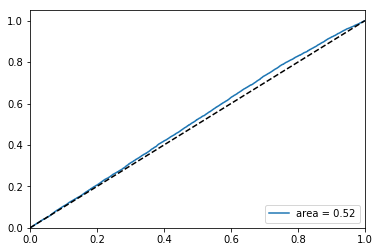

In [221]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
pred_probas = lr.predict_proba(test_vecs)[:,1]
fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.show()

In [228]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state=0)
lr.fit(train_vecs, y_train)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
lr.predict_proba([train_vecs[i, :]])

In [253]:
count = 0
for i, x in enumerate(y_test):
    if(x == 1 and lr.predict_proba([train_vecs[i, :]])[0, 1] < 0.5):
        #print(lr.predict_proba([train_vecs[i, :]]), x)
        count += 1


In [260]:
X = buildWordVector("Прекрасное начало!", n_dim)
lr.predict_proba(X)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.61466793,  0.38533207]])

In [256]:
from sklearn import metrics
# summarize the fit of the model
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

             precision    recall  f1-score   support

          0       0.51      0.53      0.52     22409
          1       0.52      0.50      0.51     22958

avg / total       0.51      0.51      0.51     45367

[[11960 10449]
 [11585 11373]]


In [257]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(train_vecs, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(test_vecs)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       0.50      0.52      0.51     22409
          1       0.51      0.49      0.50     22958

avg / total       0.50      0.50      0.50     45367

[[11563 10846]
 [11734 11224]]


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, min_df=3)
tfidf.fit(x_train.values.astype('U'))
tfidf_train = np.array(tfidf.transform(x_train.values.astype('U')).todense(), dtype=np.float16)
tfidf_test = np.array(tfidf.transform(x_test.values.astype('U')).todense(), dtype=np.float16)

tfidf_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
var_param = {
    "min_samples_split": [i for i in range(2, 25)],
    "max_depth": [i for i in range(1, 100)] + [None],
    "criterion": ["gini", "entropy"],
    "n_estimators": [i for i in range(1, 35)]
}
iters = 30
random_search = RandomizedSearchCV(clf, param_distributions=var_param, n_iter=iters)
random_search.fit(tfidf_train, y_train)
print(random_search.best_params_)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, min_df=3)
tfidf.fit(data['ttext'].values.astype('U'))
tfidf_train = np.array(tfidf.transform(data['ttext'].values.astype('U')).todense(), dtype=np.float16)

tfidf_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [23]:
import _pickle 
# save the classifier
with open('TFIDF_Vectorizer_Full.pkl', 'wb') as fid:
    _pickle.dump(tfidf, fid)    

# load it again
with open('TFIDF_Vectorizer_Full.pkl', 'rb') as fid:
    tfidf_loaded = _pickle.load(fid)

In [101]:
joblib.dump(tfidf, 'TFIDF_Vectorizer_Full.joblib') 

['TFIDF_Vectorizer_Full.joblib']

In [102]:
tfidf_loaded = joblib.load('TFIDF_Vectorizer_Full.joblib')
tfidf_loaded

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [4]:
import _pickle 
# load it again
with open('TFIDF_Vectorizer_Full.pkl', 'rb') as fid:
    tfidf_loaded = _pickle.load(fid)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [11]:
unique, counts = np.unique(tfidf_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 226048722,
 0.06033: 1,
 0.06287: 1,
 0.07184: 1,
 0.0869: 1,
 0.0937: 1,
 0.10284: 1,
 0.10394: 1,
 0.1046: 1,
 0.1049: 1,
 0.1096: 1,
 0.1104: 1,
 0.11084: 1,
 0.11127: 1,
 0.1126: 1,
 0.1132: 1,
 0.1155: 1,
 0.1157: 1,
 0.1171: 1,
 0.1172: 1,
 0.11725: 1,
 0.1179: 1,
 0.119: 1,
 0.12024: 1,
 0.12054: 1,
 0.1209: 1,
 0.1225: 1,
 0.1235: 1,
 0.1245: 1,
 0.126: 1,
 0.127: 2,
 0.1271: 2,
 0.1272: 1,
 0.1277: 3,
 0.1278: 1,
 0.1283: 1,
 0.1289: 1,
 0.1292: 2,
 0.1293: 1,
 0.1298: 1,
 0.13: 1,
 0.1307: 1,
 0.1309: 1,
 0.1315: 2,
 0.132: 1,
 0.1321: 1,
 0.1323: 6,
 0.1324: 1,
 0.133: 3,
 0.1334: 2,
 0.1335: 1,
 0.1338: 1,
 0.1339: 1,
 0.1343: 1,
 0.1345: 1,
 0.1346: 1,
 0.1349: 1,
 0.1353: 9,
 0.1354: 2,
 0.1356: 1,
 0.1357: 1,
 0.136: 1,
 0.1362: 1,
 0.1365: 4,
 0.1368: 1,
 0.137: 1,
 0.1371: 1,
 0.1372: 1,
 0.1373: 1,
 0.1375: 2,
 0.1377: 1,
 0.1378: 1,
 0.138: 1,
 0.1381: 1,
 0.1383: 1,
 0.1384: 2,
 0.1385: 1,
 0.1387: 1,
 0.1388: 3,
 0.1389: 1,
 0.139: 1,
 0.1393: 1,
 0.1398: 3,


In [24]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(tfidf_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(tfidf_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       0.64      0.60      0.62     22334
          1       0.64      0.68      0.66     23033

avg / total       0.64      0.64      0.64     45367

[[13385  8949]
 [ 7379 15654]]


In [24]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(tfidf_train, data['ttype'])
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [100]:
from sklearn.externals import joblib
joblib.dump(model, 'Decision_Tree_Full.joblib') 

['Decision_Tree_Full.joblib']

In [41]:
model_loaded = joblib.load('Decision_Tree_Full.joblib')

In [75]:
model_loaded.n_classes_

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

In [25]:
import _pickle 
# save the classifier
with open('Decision_Tree_Full.pkl', 'wb') as fid:
    _pickle.dump(model, fid)    

# load it again
with open('Decision_Tree_Full.pkl', 'rb') as fid:
    model_loaded = _pickle.load(fid)

In [ ]:
from yaml import dump, load
from io import StringIO
from struct import pack
import random


dumped = dump(model)
loaded = load(StringIO(dumped))

In [5]:
# load it again
with open('Decision_Tree_Full.pkl', 'rb') as fid:
    model_loaded = _pickle.load(fid)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
tr = np.array(tfidf_loaded.transform(["прекрасный начать"]).todense(), dtype=np.float16)
model_loaded.predict_proba(tr)

array([[0., 1.]])

In [55]:
print(x_train)
tr = np.array(tfidf.transform(["прекрасный начать"]).todense(), dtype=np.float16)
model_loaded.predict_proba(tr)

47211                                          немного юмор
19116     черта завтра англииския забыть прийтись делать...
79045     аххахах обязанность вечерний развлекушник снят...
63098                                        купить пирожок
24959     новыя год скорее приходиия ждать положить ёлоч...
77776     редко приходить домои поздний последний время ...
113075    выиграть согласный настроение человек уметь ис...
4648      гы пончик мочь назавтра новость ремикс оставти...
40479     увидеть расписание след неделя ребята советуит...
37119     выходной подстричься купить очки работа компью...
29608                              локоть танцевать поп поп
6511                        хотеть секс мной пускай соснуть
68638                         ради кто доказывать весь знач
4943      оказаться таки битый архиватор открывать монти...
36945      поехать работа наверно это время дом давно будеш
99753     лента советовать валить пока поздно ибо быть к...
82297                      перестать нов

array([[ 0.,  1.]])

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(tfidf_train, y_train)
expected = y_test
predicted = clf.predict(tfidf_test)

print(clf.feature_importances_)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

[ 0.00041134  0.00082007  0.00058077  0.00037609  0.00067518  0.00134811
  0.00081562  0.00049786  0.00054056  0.00038521  0.00146284  0.00306226
  0.00101556  0.0008475   0.0025809   0.00054732  0.00480081  0.00052808
  0.00062645  0.00041261  0.00044662  0.0010085   0.00032668  0.00038594
  0.00109528  0.00063781  0.00093921  0.00048085  0.00832925  0.00232421
  0.00158028  0.00134686  0.00245202  0.00384198  0.00135143  0.00074255
  0.00085992  0.00041045  0.00075648  0.00039401  0.00126403  0.00095896
  0.0007023   0.00038471  0.00075995  0.00105311  0.00093151  0.00073998
  0.00406913  0.00062852  0.00054459  0.00129178  0.00053705  0.0005638
  0.00071251  0.00046845  0.00088632  0.00072505  0.00057732  0.00084288
  0.00046576  0.00388428  0.00125673  0.00153072  0.00056013  0.00046052
  0.00057148  0.00137709  0.00089987  0.0009127   0.00268271  0.00094927
  0.00044455  0.00048777  0.00133157  0.00044896  0.0002928   0.00050456
  0.00083307  0.00096078  0.00032268  0.00040768  0.

In [56]:
# save the classifier
with open('Random_Forest.pkl', 'wb') as fid:
    _pickle.dump(clf, fid)    

# load it again
with open('Random_Forest.pkl', 'rb') as fid:
    clf_loaded = _pickle.load(fid)

In [57]:
tr = np.array(tfidf.transform(["прекрасный начать"]).todense(), dtype=np.float16)
clf_loaded.predict_proba(tr)

array([[ 0.1738311,  0.8261689]])

In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state=0)
lr.fit(tfidf_train, data['ttype'])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [44]:
expected = y_test
predicted = lr.predict(tfidf_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.69      0.60      0.64     22334
          1       0.66      0.74      0.69     23033

avg / total       0.67      0.67      0.67     45367

[[13428  8906]
 [ 6080 16953]]


In [58]:
import _pickle 
# save the classifier
with open('Logistic_Regression.pkl', 'wb') as fid:
    _pickle.dump(lr, fid)    

# load it again
with open('Logistic_Regression.pkl', 'rb') as fid:
    lr_loaded = _pickle.load(fid)

In [62]:
tr = np.array(tfidf_loaded.transform(["прекрасный начать"]).todense(), dtype=np.float16)
lr_loaded.predict_proba(tr)

array([[ 0.15216956,  0.84783044]])

In [2]:
from flask.request import 


In [99]:
import requests
response = requests.post("https://3imxbx6780.execute-api.eu-west-3.amazonaws.com/dev/sentiment", data = {'header' : 'norm', 'text' : "я тебя люблю"})
results = response.content.decode("UTF-8")
print(results)

{"score":0.7142857142857143}



In [114]:
import json
text = 'я тебя люблю'
r = requests.post("https://7pyovt43zb.execute-api.eu-west-3.amazonaws.com/dev/sentiment", data = {'text' : text})
results = r.content.decode('Utf-8')
json.loads(results)['score']

0.7142857142857143

In [104]:
import http.client
conn = http.client.HTTPSConnection('https://textsentiment-mining.com/')
conn.request('GET', '/') # <---
r = conn.getresponse()
print(r.read())

InvalidURL: nonnumeric port: '//textsentiment-mining.com/'

In [194]:
import urllib
import json


headers = {'text' : "отвратительный"}
response = urllib.request.urlopen('https://xnbbj8f669.execute-api.eu-west-3.amazonaws.com/dev/' , 
                                  data = bytes(json.dumps(headers), encoding="utf-8")) 
print ('response headers: "%s"' % response.json)
try:
    a = 1
except IOError as e:
    if hasattr(e, 'code'): # HTTPError
        print ('http error code: ', e.code)
    elif hasattr(e, 'reason'): # URLError
        print ("can't connect, reason: ", e.reason)
    else:
        raise

HTTPError: HTTP Error 405: Method Not Allowed

In [195]:
print(" ".join([morph.parse(y)[0].normal_form for y in "отвратительный".split(" ")]))

отвратительный


In [20]:
from nltk.stem.snowball import RussianStemmer
r = RussianStemmer()
print(r.stem("отвратительный"))

отвратительн


In [234]:
data[data['ttext'].str.contains("отврат")]

,ttext,ttype
547,лаадно поной стать отвратительный настроение з...,1
24879,безудержно весёлый утро отвратительный кот раз...,1
26223,такой отвратительный театральный язык прогон р...,1
42548,отвратный защита лаб бжд это самый малый пробл...,1
43974,толстой просто перестараться мышца качать счит...,1
50027,футболка хотеть отвратительный поведение кто д...,1
57183,марин инякина вообще тряпка отвратный сопляк м...,1
62226,такой человек который моментально вызывать отв...,1
65882,этот погода отвратительный деиствовать мой апп...,1
71770,ахаахха ладный надеяться ты это отвратн,1


In [123]:
morph = pymorphy2.MorphAnalyzer()
text = "Хорошее начало"
nor = " ".join([morph.parse(y)[0].normal_form for y in text.split(" ")])
print(nor)

хороший начать


In [124]:
r = RussianStemmer()
ste = r.stem(text)
print(ste)

хорошее нача
